In [1]:
import pandas as pd
import sklearn
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
import numpy as np
#vizualization
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns',None)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize']=12,8

#import warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Get the data
bank_data=pd.read_csv('bank.csv')
bank_copy=bank_data.copy()
#Get the shape and information of data
print("The shape of this bank data in rows and columns :{}\n".format(bank_copy.shape))
print("Information of the data---->\n")
print(bank_copy.info())

The shape of this bank data in rows and columns :(11162, 17)

Information of the data---->

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


## Dataset:

-  We have 11162 instances and  17 features. The information says there are no null values.

### Attributes: Bank client data:

- Age : Age of the lead (numeric)
- Job : type of job (Categorical)
- Marital : Marital status (Categorical)
- Education : Educational Qualification of the lead (Categorical)
- Default: Does the lead has any default(unpaid)credit (Categorical)
- Housing: Does the lead has any housing loan? (Categorical)
- loan: Does the lead has any personal loan? (Categorical)
###  Related with the last contact of the current campaign:

- Contact: Contact communication type (Categorical)
- Month: last contact month of year (Categorical)
- day_of_week: last contact day of the week (categorical)
- duration: last contact duration, in seconds (numeric).
- Important note: Duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

###  Other attributes:

- campaign: number of contacts performed during this campaign and for this client (numeric)
- pdays: number of days that passed by after the client was last contacted from a previous campaign(numeric; 999 means client was not previously contacted))
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical)

###  Output variable (desired target):

- deposit - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
bank_copy.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [4]:
bank_copy.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [5]:
bank_copy.describe()


age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

In [6]:
#checking the categories  with respect to counts in each feature
categorical_features=[i for i in bank_copy.columns if bank_copy[i].dtype=='O']
for i in categorical_features:
    counts=bank_copy[i].value_counts()
    print(f'---  {i}:\n\n{counts}\n')

---  job:

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

---  marital:

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

---  education:

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

---  default:

no     10994
yes      168
Name: default, dtype: int64

---  housing:

no     5881
yes    5281
Name: housing, dtype: int64

---  loan:

no     9702
yes    1460
Name: loan, dtype: int64

---  contact:

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

---  month:

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

---

### Data Cleaning
 - checking the mssing values
 

<Axes: >

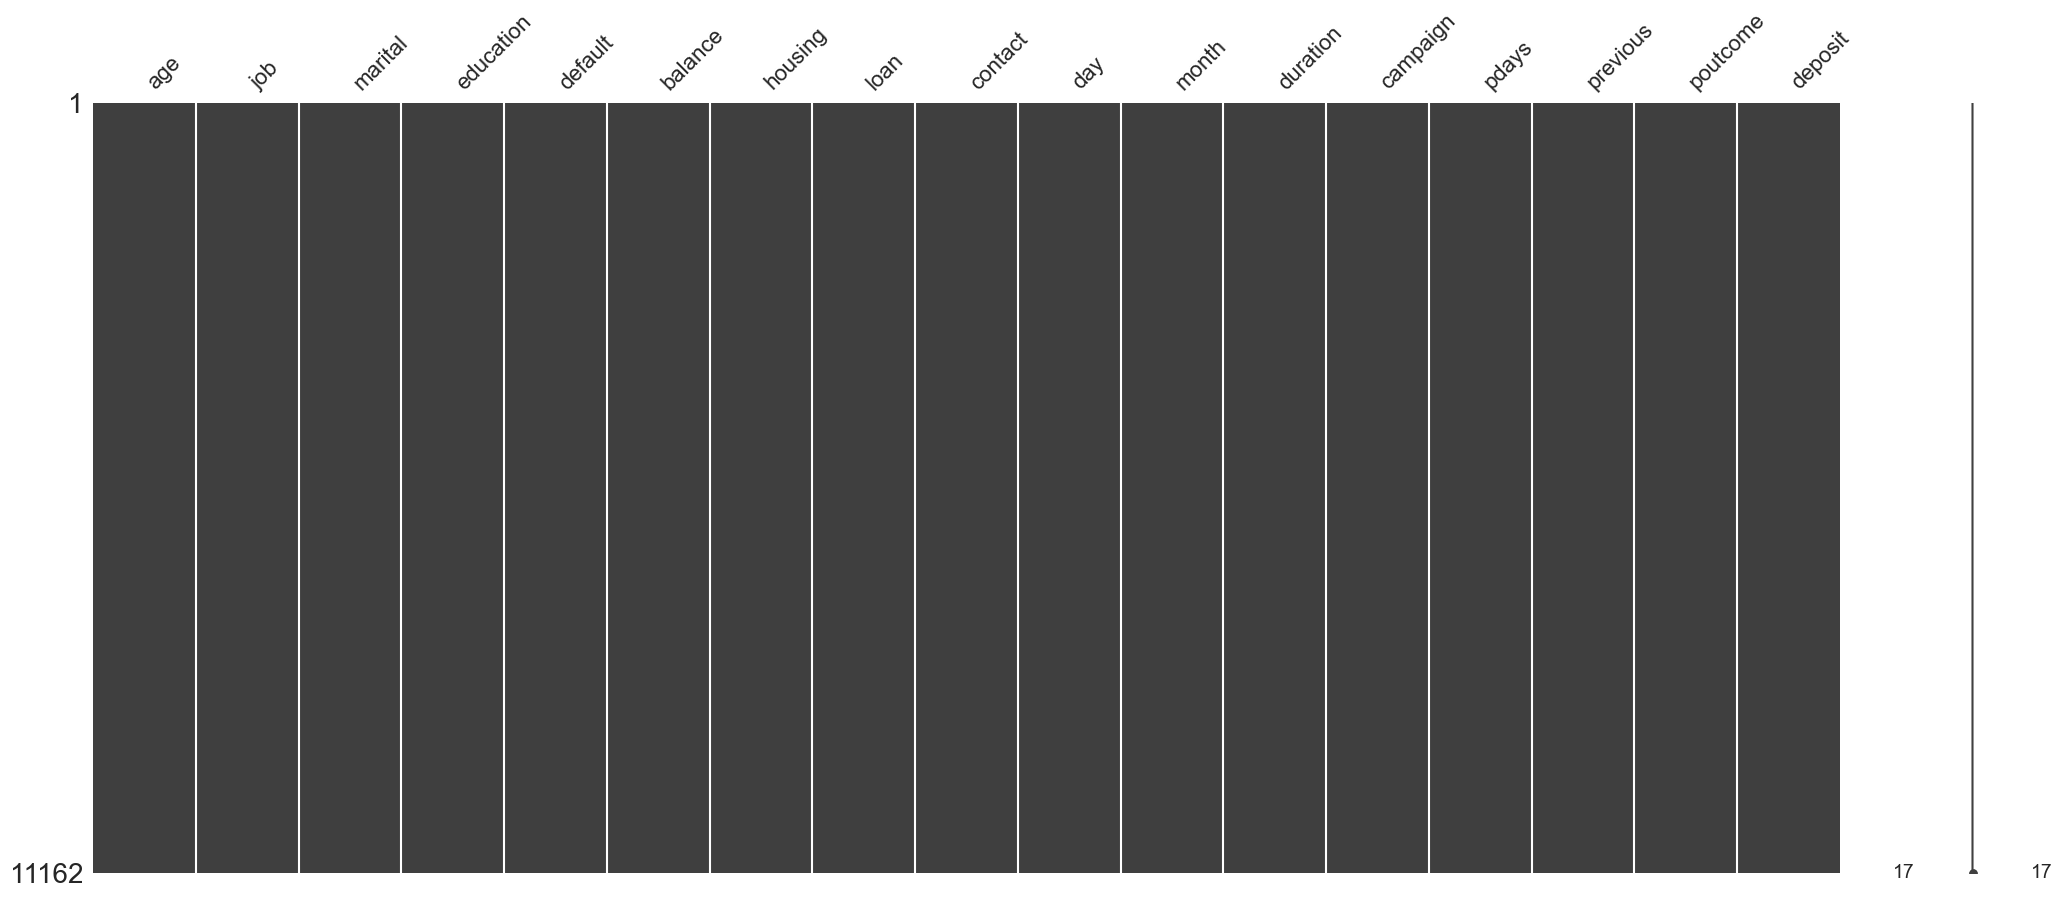

In [7]:
import missingno as msno
msno.matrix(bank_copy)

In [8]:
print("Datas with null values",bank_copy.isnull().sum(),sep='\n')

Datas with null values
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


Looks like we don't have any null values except one. 

### Data Visualization 

##### Duration of Calls VS Job Roles

In [9]:
import plotly.express as px
df=px.box(bank_copy,x='job',y='duration',color="deposit")
df.update_traces(quartilemethod='inclusive')
df.show()

### Insights:

- The leads who have not made a deposit have lesser duration on calls
- Comparing the average, the blue collar, entrepreneur have high duration in calls and student, retired have less duration in average
- Large distribution of leads were from self employed clients and management people.

##### Campaign vs Duration calls

In [10]:
camp_time=px.scatter(bank_copy,x="campaign",y="duration",color="deposit")
camp_time.show()

### Insights:

- The more the duration the calls were, they had higher probability in making a deposit
- Duration of calls faded as the time period of campaign extended further
- There were many positive leads in the initial days of campaign

###### Campaign VS Month

<BarContainer object of 11162 artists>

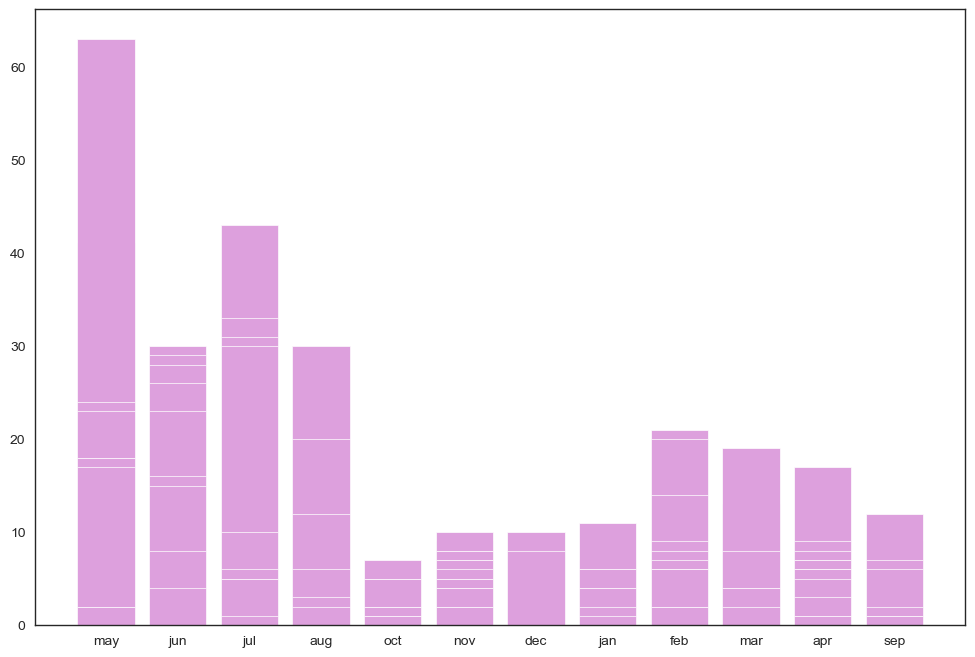

In [11]:
plt.bar(bank_copy['month'],bank_copy['campaign'],color='plum')

### Insights:

- We can see the campaign were mostly concentrated in the starting of the bank period ( May, June and July)
- Usually education period starts during that time so there is a possibility that parents make deposits in the name of their children
- They also have made their campaign in the end of the bank period.

###### Positive deposits vs attributes

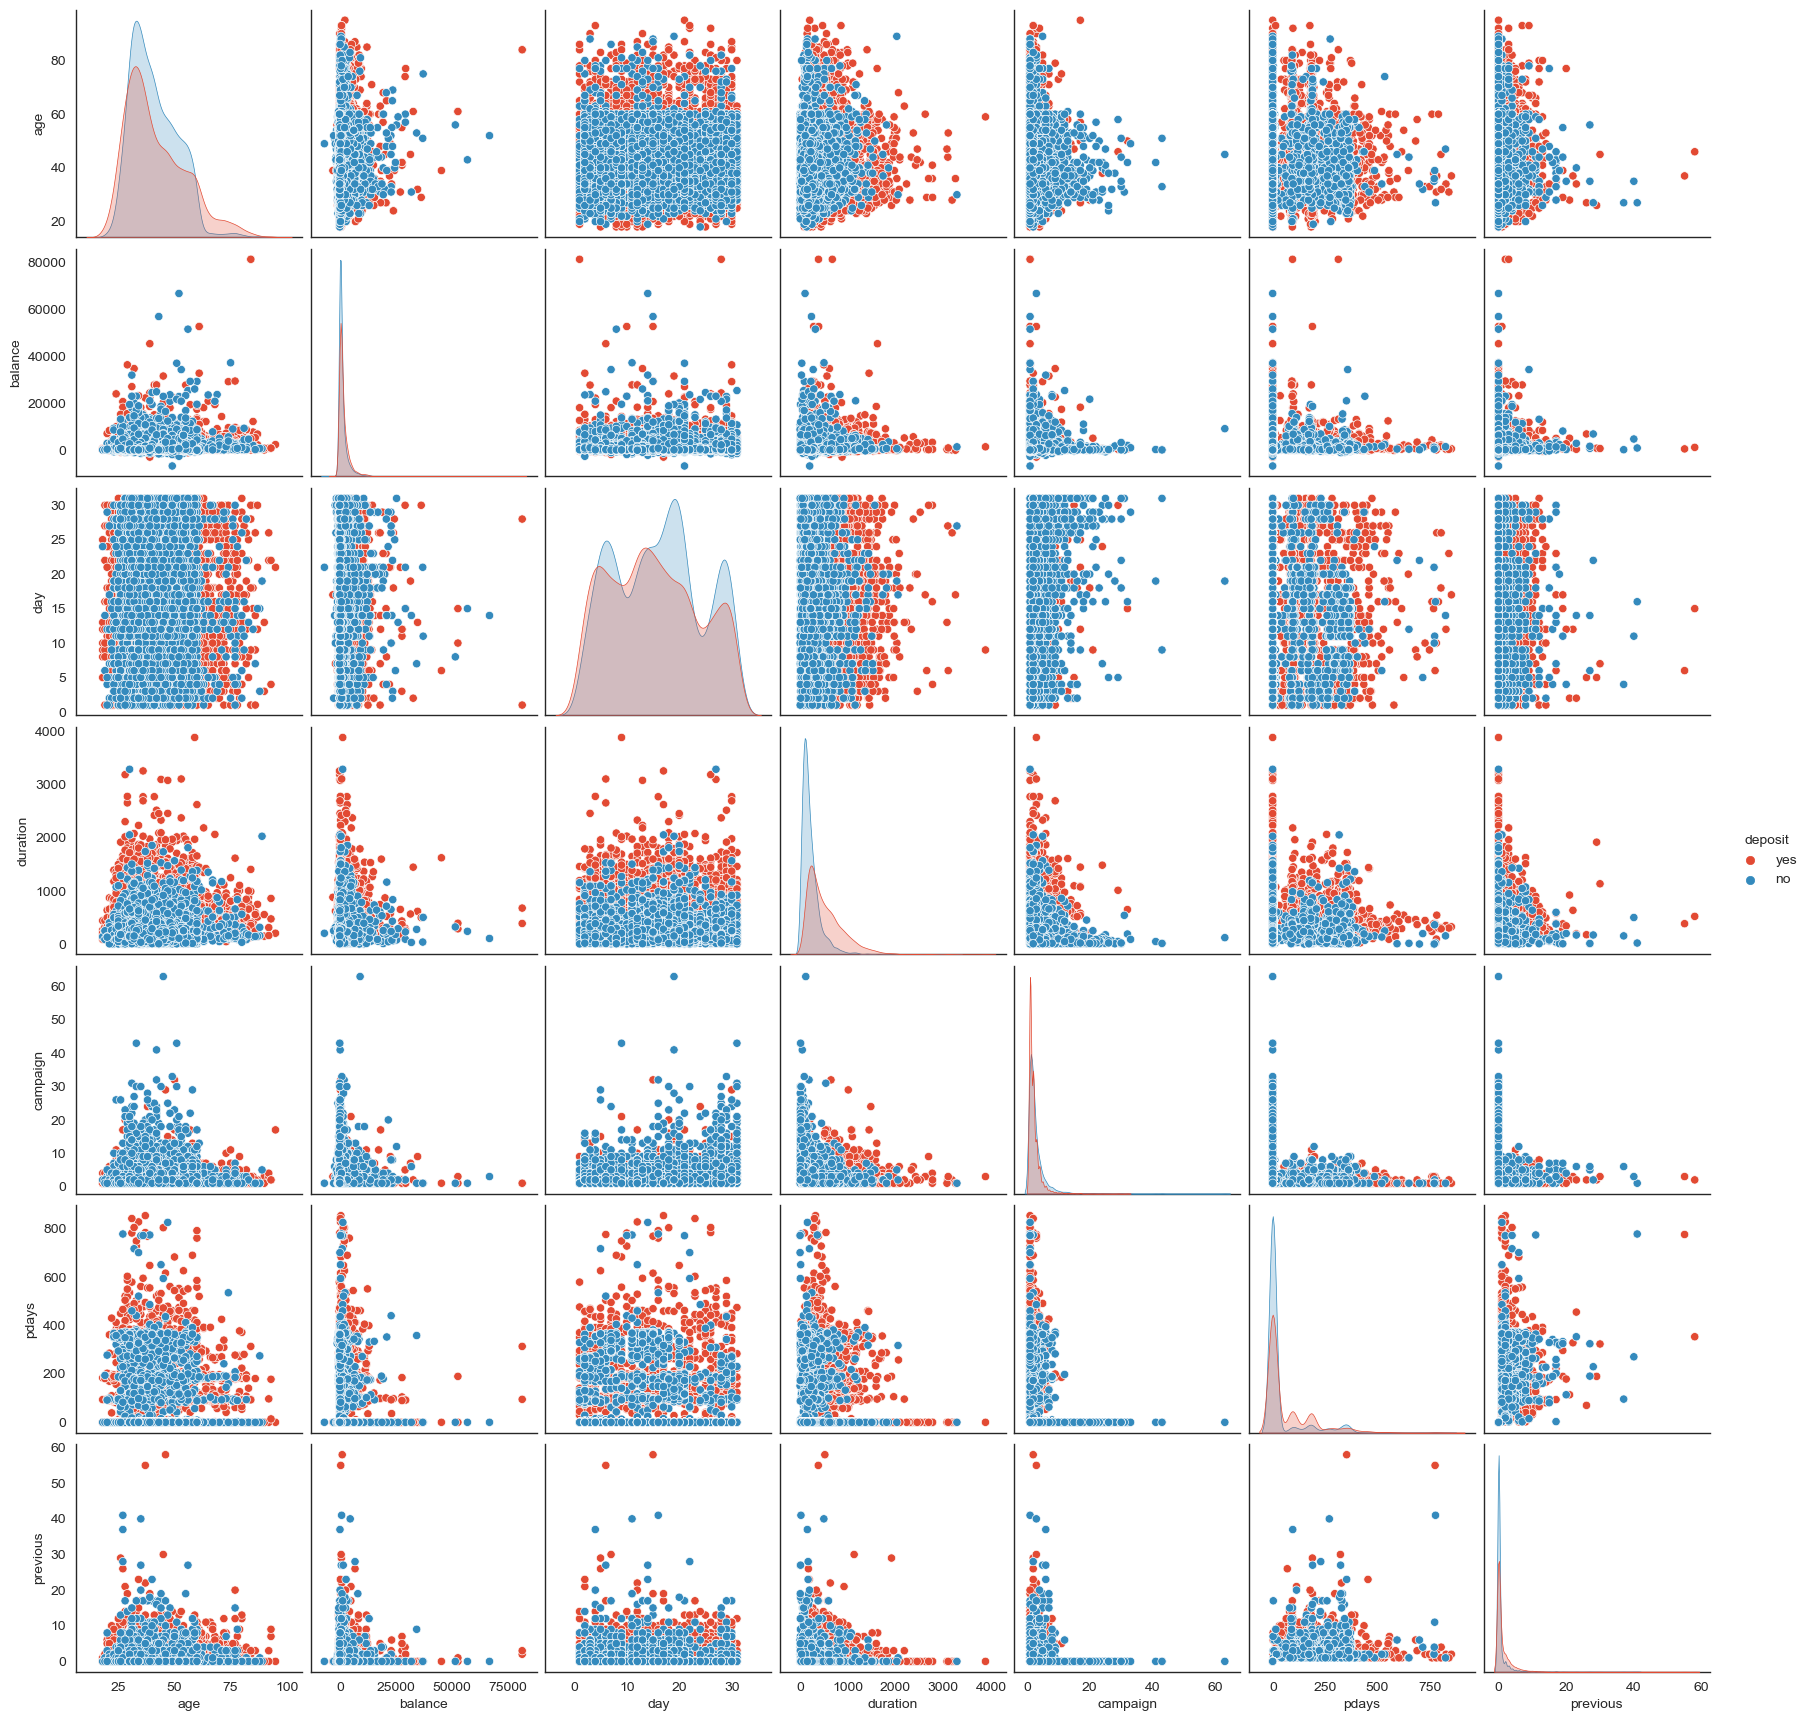

In [12]:
sns.pairplot(bank_copy,hue="deposit")

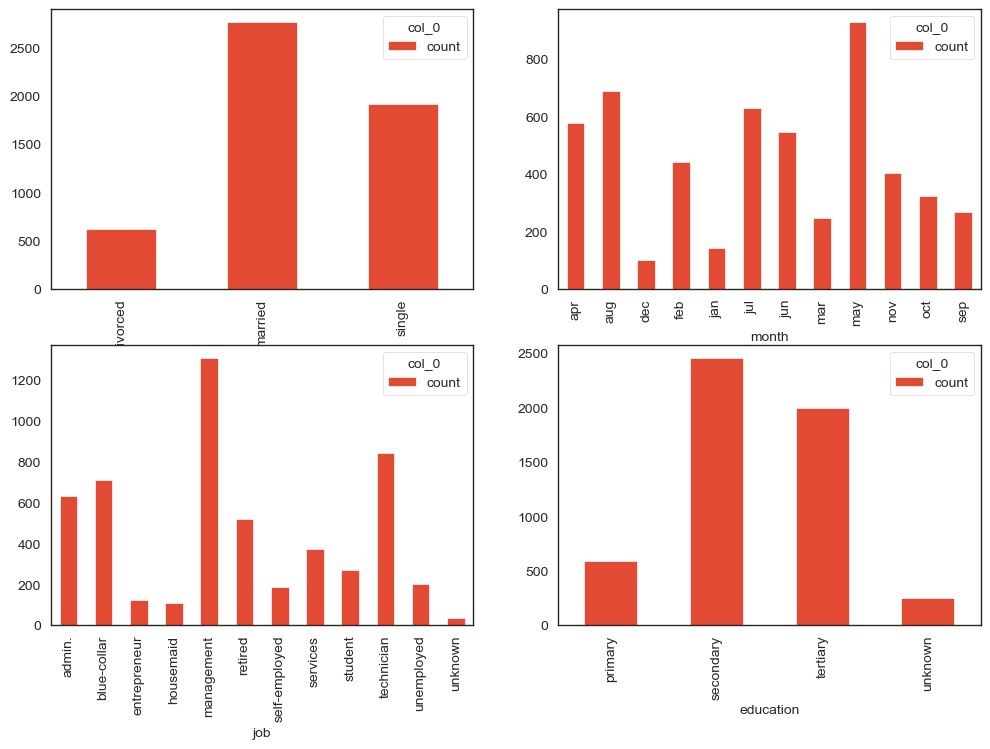

In [13]:
bank_yes=bank_copy[bank_copy['deposit']=='yes']
columns = ["marital", "month", "job", "education"]
fig, axes = plt.subplots(nrows=2, ncols=2)

for i, col in enumerate(columns):
    df = pd.crosstab(index=bank_yes[col], columns="count")
    df.plot.bar(ax=axes[i//2, i%2])

### Insights:

- Married leads have made high deposits followed by single
- There were much deposist made during may month as it is the start of bank period
- Leads who work in administrative position made deposits followed by technicians and blue collar employees
- Leads who had atleast university degree had made te deposits followed by highschool

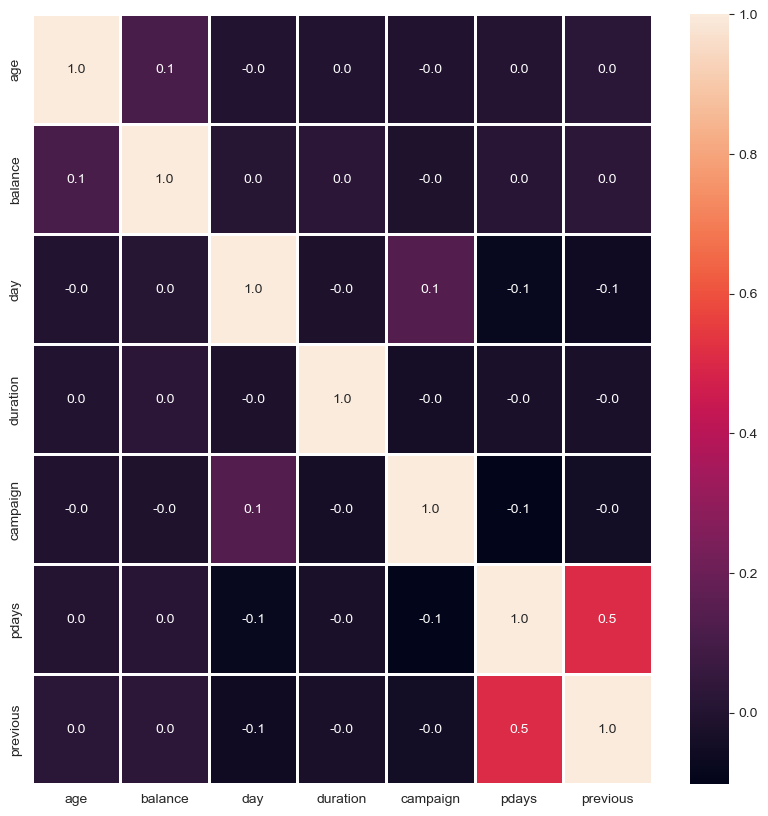

In [14]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(bank_copy.corr(),annot=True,linewidths=1,fmt='.1f',ax=ax)
plt.show()

### Feature Engineeering
- Handing Outliers

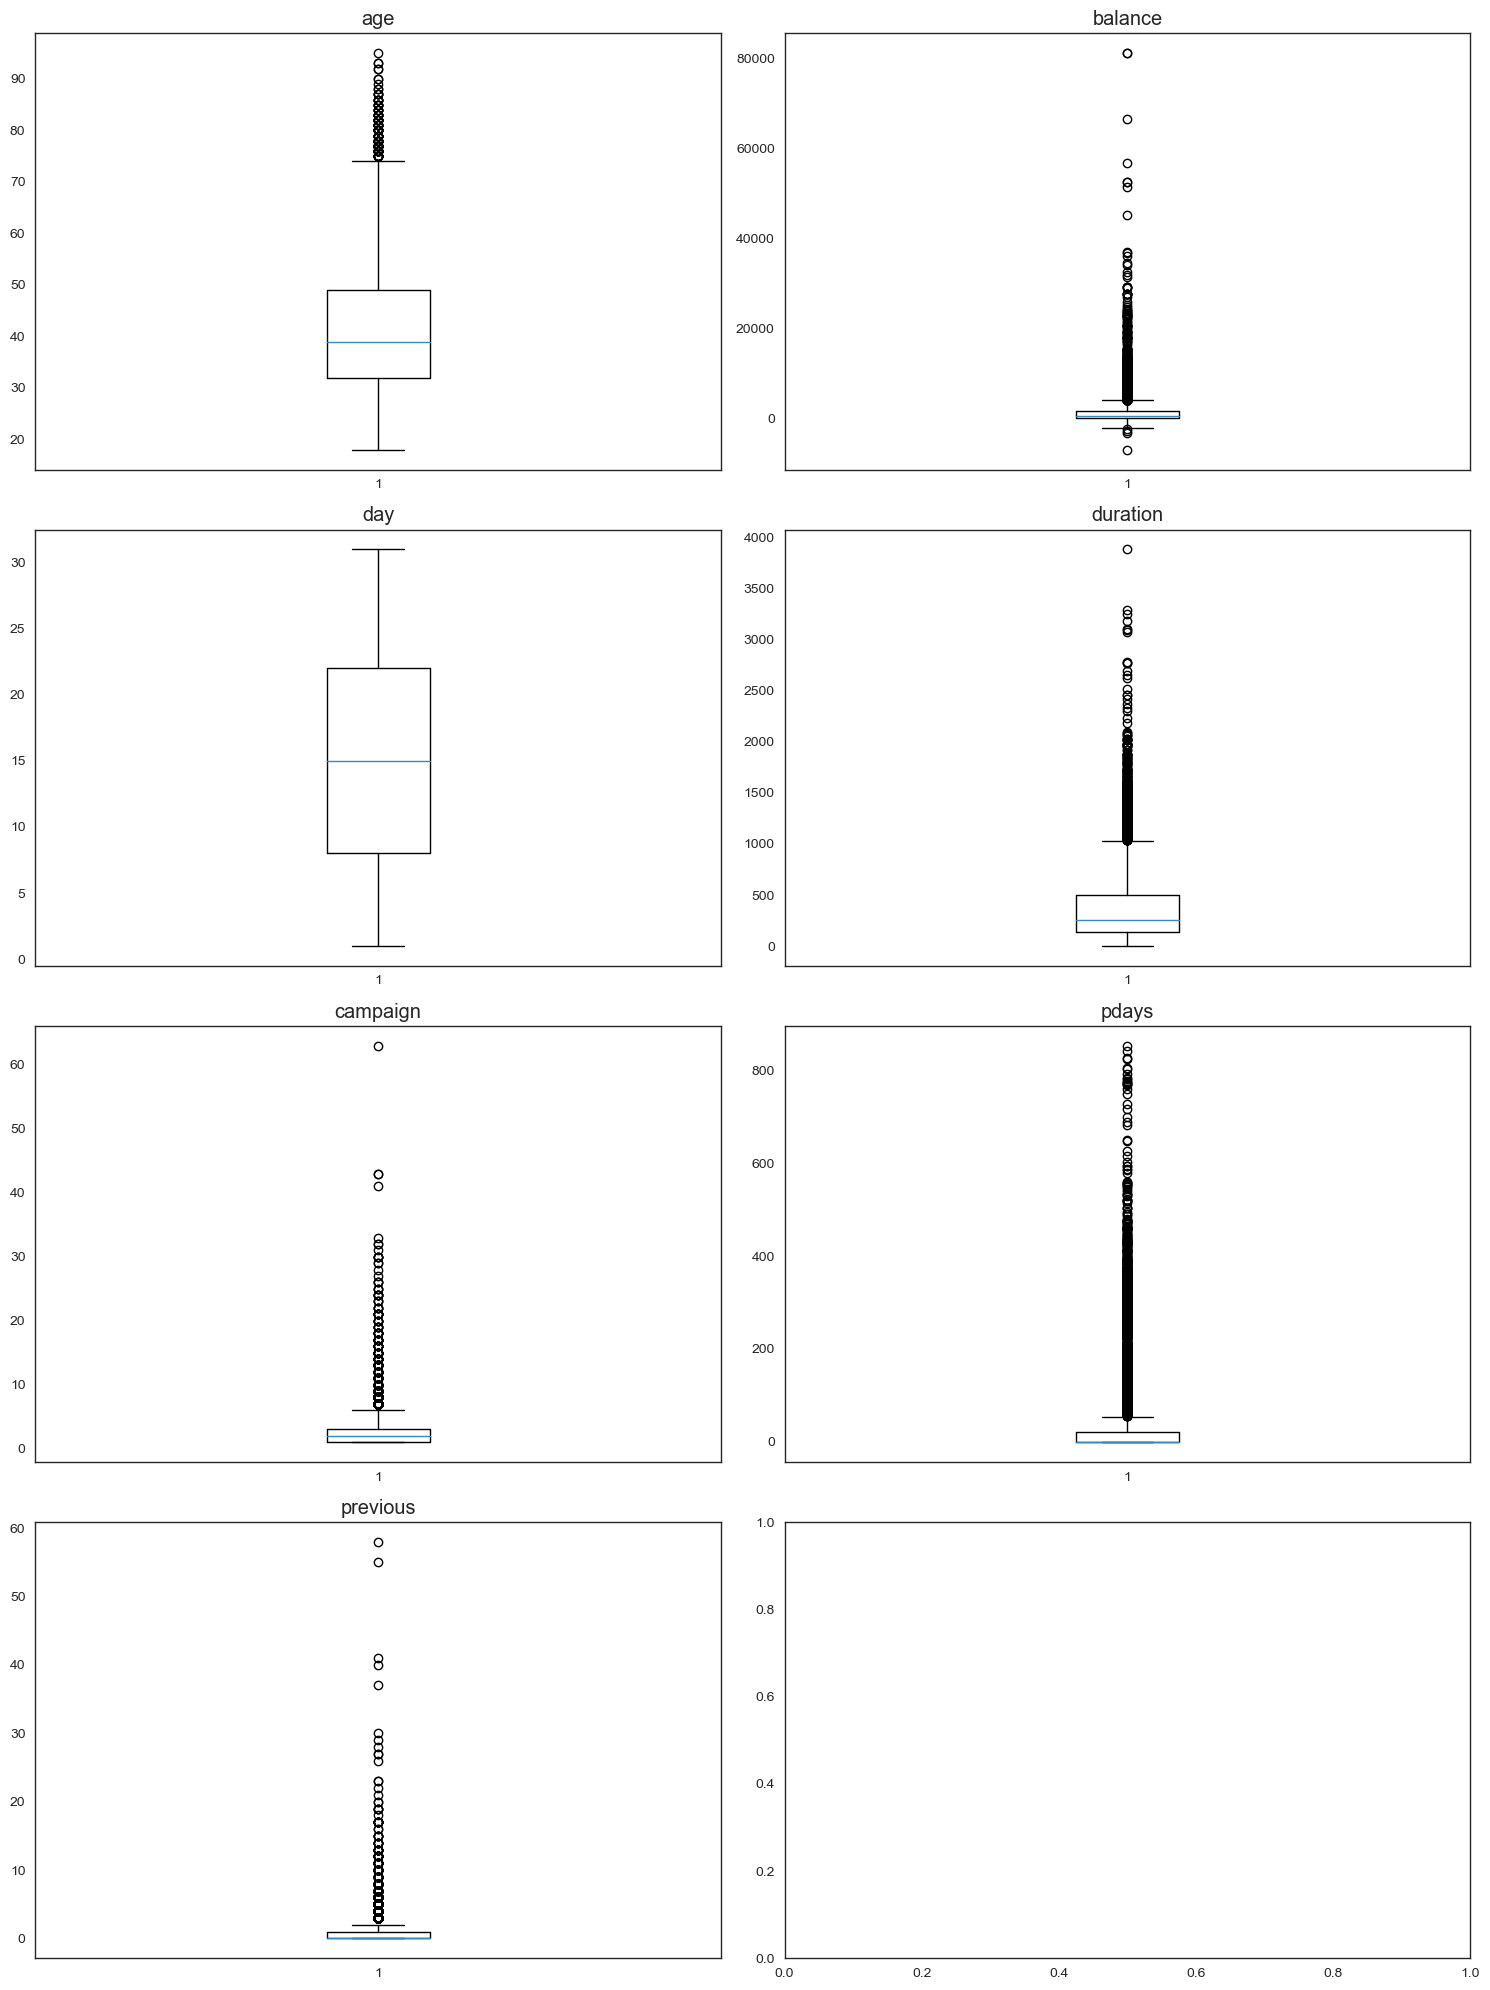

In [15]:
variables = ['age', 'balance', 'day','duration','campaign', 'pdays','previous']

# Set up the plot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
plt.style.use('seaborn-white')

# Loop through the variables and plot each one
for i, variable in enumerate(variables):
    row = i // 2  
    col = i % 2   
    ax = axes[row, col]  # Get the corresponding subplot
    ax.boxplot(bank_copy[variable])
    ax.set_title(variable)
    
plt.tight_layout()   # Adjust the layout of the plot
plt.show()    

In [16]:
numerical_features=['age', 'balance', 'duration','campaign', 'pdays','previous']
for i in numerical_features:
    Q1=bank_copy[i].quantile(0.25)
    Q3=bank_copy[i].quantile(0.75)
    IQR=Q3-Q1
    
    filtered=(bank_copy[i]>=Q1 -1.5*IQR) & (bank_copy[i]<=Q3+1.5*IQR)
    bank_copy=bank_copy.loc[filtered]

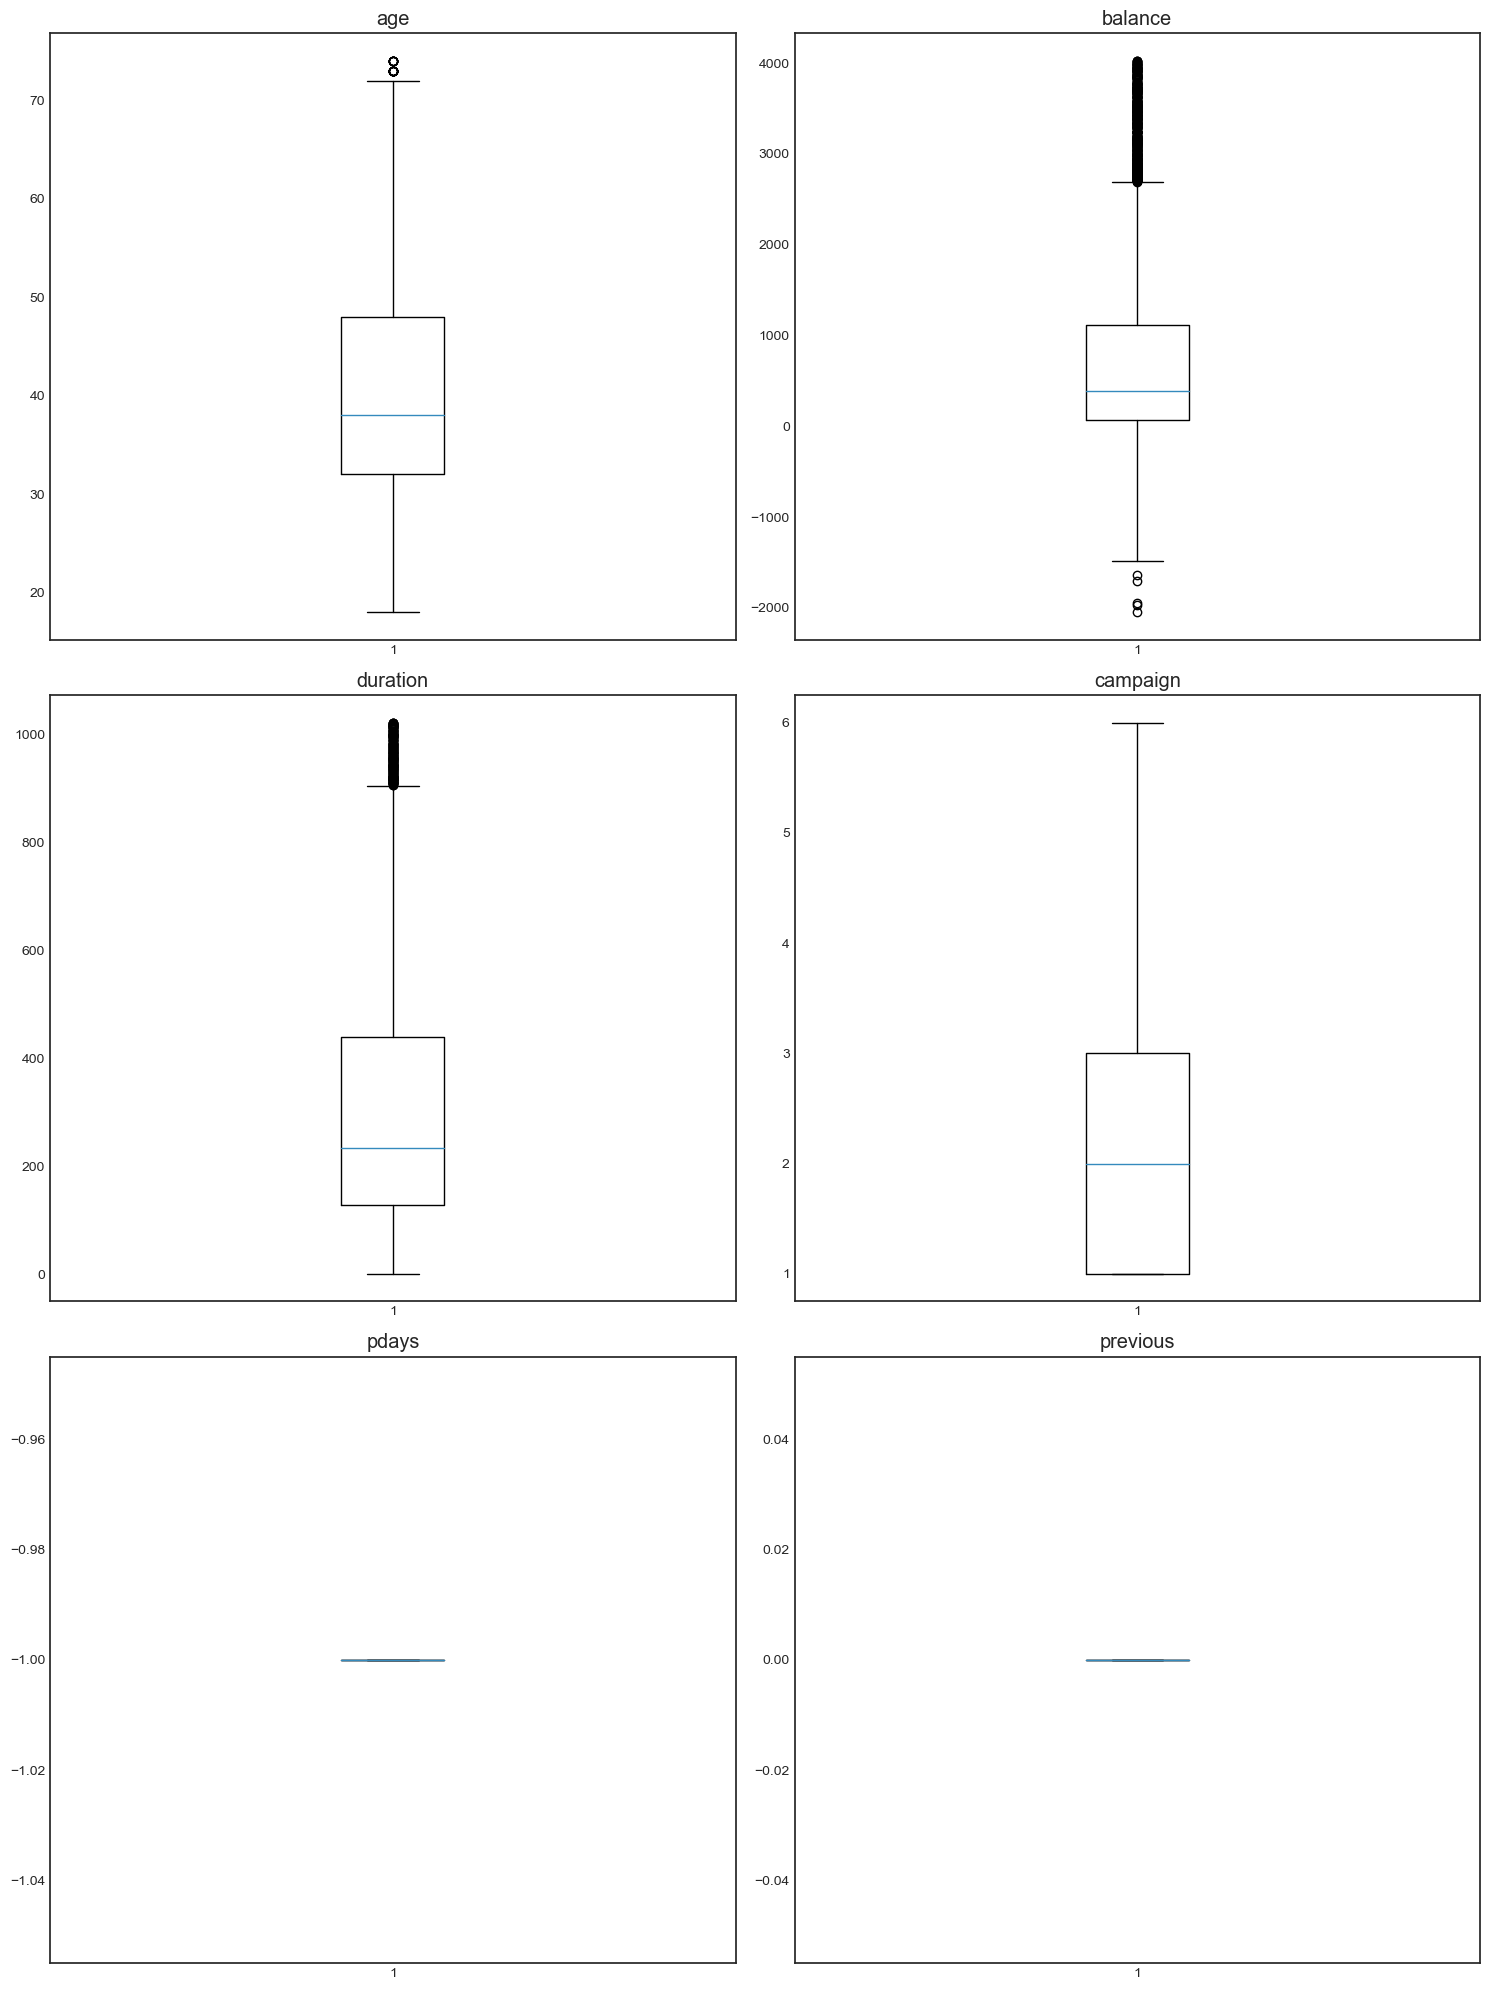

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
plt.style.use('seaborn-white')

for i, variable in enumerate(numerical_features):
    row = i // 2  
    col = i % 2   
    ax = axes[row, col]  # Get the corresponding subplot
    ax.boxplot(bank_copy[variable])
    ax.set_title(variable)
    
plt.tight_layout()   # Adjust the layout of the plot
plt.show() 

##### Encoding Month and Day of the week

In [18]:
bank_feature=bank_data.copy()

In [19]:
month_dict={'apr':4,'may':5,'jan':1,'feb':2,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'mar':3,'dec':12}
bank_feature['month']= bank_feature['month'].map(month_dict) 



In [20]:

bank_feature.loc[:,['month','day']].head(10)

month  day
0      5    5
1      5    5
2      5    5
3      5    5
4      5    5
5      5    5
6      5    6
7      5    6
8      5    6
9      5    6

In [21]:
bank_feature['pdays'].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: pdays, Length: 472, dtype: int64

In [22]:
dummy_contact=pd.get_dummies(bank_feature['contact'], prefix='dummycontact_',drop_first=True)
dummy_outcome=pd.get_dummies(bank_feature['poutcome'], prefix='dummypoutcome_',drop_first=True)
bank_feature = pd.concat([bank_feature,dummy_contact,dummy_outcome],axis=1)
bank_feature.drop(['contact','poutcome'],axis=1, inplace=True)

In [23]:
bank_feature.loc[:,['dummycontact__telephone','dummycontact__unknown','dummypoutcome__success','dummypoutcome__other','dummypoutcome__unknown']].head()

dummycontact__telephone  dummycontact__unknown  dummypoutcome__success  \
0                        0                      1                       0   
1                        0                      1                       0   
2                        0                      1                       0   
3                        0                      1                       0   
4                        0                      1                       0   

   dummypoutcome__other  dummypoutcome__unknown  
0                     0                       1  
1                     0                       1  
2                     0                       1  
3                     0                       1  
4                     0                       1

In [24]:
bank_feature.head()

age         job  marital  education default  balance housing loan  day  \
0   59      admin.  married  secondary      no     2343     yes   no    5   
1   56      admin.  married  secondary      no       45      no   no    5   
2   41  technician  married  secondary      no     1270     yes   no    5   
3   55    services  married  secondary      no     2476     yes   no    5   
4   54      admin.  married   tertiary      no      184      no   no    5   

   month  duration  campaign  pdays  previous deposit  \
0      5      1042         1     -1         0     yes   
1      5      1467         1     -1         0     yes   
2      5      1389         1     -1         0     yes   
3      5       579         1     -1         0     yes   
4      5       673         2     -1         0     yes   

   dummycontact__telephone  dummycontact__unknown  dummypoutcome__other  \
0                        0                      1                     0   
1                        0                      1                     0   
2                        0                      1                     0   
3                        0                      1                     0   
4                        0                      1                     0   

   dummypoutcome__success  dummypoutcome__unknown  
0                       0                       1  
1                       0                       1  
2                       0                       1  
3                       0                       1  
4                       0                       1

###### Frequency encoding
- Let's use frequency encoding with job and education features in our dataset

In [25]:
bank_job=bank_feature['job'].value_counts().to_dict()
bank_education=bank_feature['education'].value_counts().to_dict()

In [26]:
bank_job

{'management': 2566,
 'blue-collar': 1944,
 'technician': 1823,
 'admin.': 1334,
 'services': 923,
 'retired': 778,
 'self-employed': 405,
 'student': 360,
 'unemployed': 357,
 'entrepreneur': 328,
 'housemaid': 274,
 'unknown': 70}

In [27]:
bank_feature['job']=bank_feature['job'].map(bank_job)
bank_feature['education']=bank_feature['education'].map(bank_education)

In [28]:
bank_feature.loc[:,['job','education']].head()

job  education
0  1334       5476
1  1334       5476
2  1823       5476
3   923       5476
4  1334       3689

In [29]:
bank_feature.isnull().sum()

age                        0
job                        0
marital                    0
education                  0
default                    0
balance                    0
housing                    0
loan                       0
day                        0
month                      0
duration                   0
campaign                   0
pdays                      0
previous                   0
deposit                    0
dummycontact__telephone    0
dummycontact__unknown      0
dummypoutcome__other       0
dummypoutcome__success     0
dummypoutcome__unknown     0
dtype: int64

###### Target Guided Ordinal Encoding
- Lets encode marital feature based on the target 'y' . First let's find the mean of target with respect to marital feature

In [30]:
bank_feature['deposit'] = bank_feature['deposit'].map({'yes': 1, 'no': 0}).astype(int)


In [31]:
bank_feature.groupby(['marital'])['deposit'].mean()

marital
divorced    0.481052
married     0.433790
single      0.543491
Name: deposit, dtype: float64

In [32]:
ordinal_labels=bank_feature.groupby(['marital'])['deposit'].mean().sort_values().index

In [33]:
ordinal_labels

Index(['married', 'divorced', 'single'], dtype='object', name='marital')

In [34]:
ordinaal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}

In [35]:
ordinaal_labels2

{'married': 0, 'divorced': 1, 'single': 2}

In [36]:
bank_feature['marital_ordinal']=bank_feature['marital'].map(ordinaal_labels2)
bank_feature.drop(['marital'], axis=1,inplace=True)

In [37]:
bank_feature.head()

age   job  education default  balance housing loan  day  month  duration  \
0   59  1334       5476      no     2343     yes   no    5      5      1042   
1   56  1334       5476      no       45      no   no    5      5      1467   
2   41  1823       5476      no     1270     yes   no    5      5      1389   
3   55   923       5476      no     2476     yes   no    5      5       579   
4   54  1334       3689      no      184      no   no    5      5       673   

   campaign  pdays  previous  deposit  dummycontact__telephone  \
0         1     -1         0        1                        0   
1         1     -1         0        1                        0   
2         1     -1         0        1                        0   
3         1     -1         0        1                        0   
4         2     -1         0        1                        0   

   dummycontact__unknown  dummypoutcome__other  dummypoutcome__success  \
0                      1                     0                       0   
1                      1                     0                       0   
2                      1                     0                       0   
3                      1                     0                       0   
4                      1                     0                       0   

   dummypoutcome__unknown  marital_ordinal  
0                       1                0  
1                       1                0  
2                       1                0  
3                       1                0  
4                       1                0

In [38]:
dictionary={'yes':1,'no':0}
bank_feature['housing']=bank_feature['housing'].map(dictionary)
bank_feature['default']=bank_feature['default'].map(dictionary)
bank_feature['loan']=bank_feature['loan'].map(dictionary)

In [39]:
bank_feature.loc[:,['housing','default','loan']].head()

housing  default  loan
0        1        0     0
1        0        0     0
2        1        0     0
3        1        0     0
4        0        0     0

###### Standardization of numerical variables

In [40]:
bank_scale=bank_feature.copy()
Categorical_variables=['job', 'education', 'default','deposit',  'housing', 'loan',
       'month',  
       'dummycontact__telephone', 'dummycontact__unknown',
       'dummypoutcome__other', 'dummypoutcome__success',
       'dummypoutcome__unknown', 'marital_ordinal']

feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [41]:
feature_scale

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [42]:
scaled_data = pd.concat([bank_scale[['job', 'education', 'default','deposit',  'housing', 'loan',
       'month',  
       'dummycontact__telephone', 'dummycontact__unknown',
       'dummypoutcome__other', 'dummypoutcome__success',
       'dummypoutcome__unknown', 'marital_ordinal']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
pickle.dump(scaler,open('scaling.pkl','wb'))
scaled_data.head()


job  education  default  deposit  housing  loan  month  \
0  1334       5476        0        1        1     0      5   
1  1334       5476        0        1        0     0      5   
2  1823       5476        0        1        1     0      5   
3   923       5476        0        1        1     0      5   
4  1334       3689        0        1        0     0      5   

   dummycontact__telephone  dummycontact__unknown  dummypoutcome__other  \
0                        0                      1                     0   
1                        0                      1                     0   
2                        0                      1                     0   
3                        0                      1                     0   
4                        0                      1                     0   

   dummypoutcome__success  dummypoutcome__unknown  marital_ordinal       age  \
0                       0                       1                0  1.491505   
1                       0                       1                0  1.239676   
2                       0                       1                0 -0.019470   
3                       0                       1                0  1.155733   
4                       0                       1                0  1.071790   

    balance       day  duration  campaign     pdays  previous  
0  0.252525 -1.265746  1.930226 -0.554168 -0.481184  -0.36326  
1 -0.459974 -1.265746  3.154612 -0.554168 -0.481184  -0.36326  
2 -0.080160 -1.265746  2.929901 -0.554168 -0.481184  -0.36326  
3  0.293762 -1.265746  0.596366 -0.554168 -0.481184  -0.36326  
4 -0.416876 -1.265746  0.867171 -0.186785 -0.481184  -0.36326

###### Feature Selection

In [43]:
x=scaled_data.drop(['deposit'],axis=1)
y=scaled_data['deposit']

In [44]:
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [45]:
Feature_top=pd.Series(model.feature_importances_,index=x.columns)

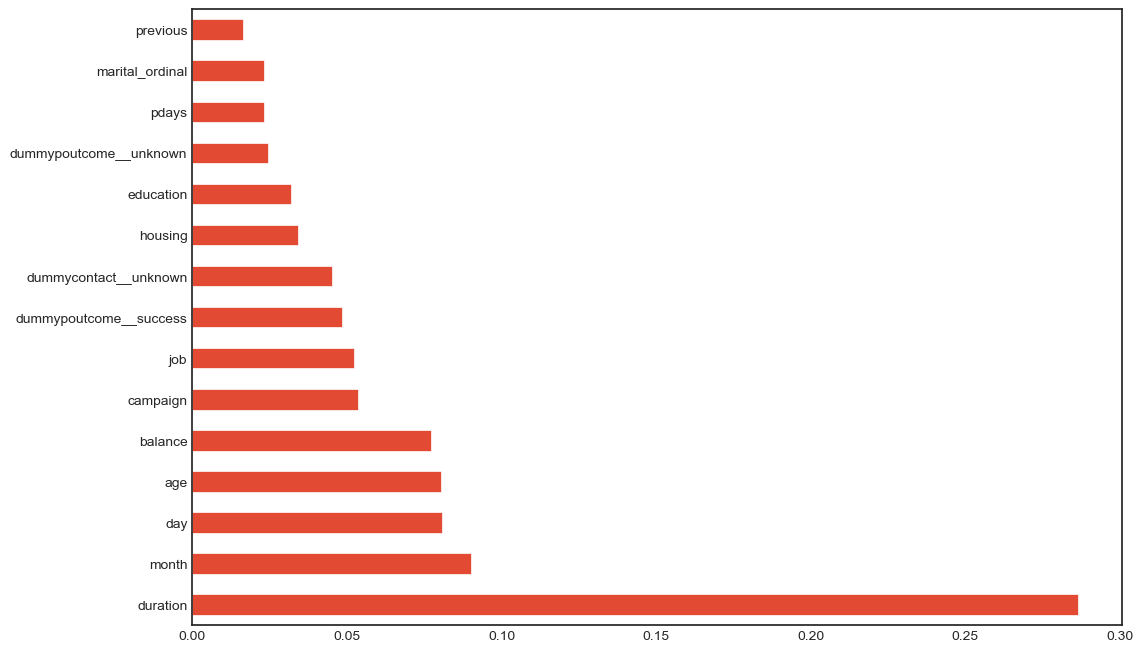

In [46]:
a=Feature_top.nlargest(15)
column_names = a.index.tolist()
a.plot(kind='barh')
plt.show()

##### Train ,Test,Split 

In [47]:
x=scaled_data[column_names]
y=scaled_data.deposit

In [48]:

X_train, X_test, y_train, y_test = train_test_split(x, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (8929, 15)
Input Test: (2233, 15)
Output Training: (8929,)
Output Test: (2233,)


######  Model Selection

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()

#svc_cv=SVC()
Gnb_cv=GaussianNB()
nb_cv=BernoulliNB()
rf_cv= RandomForestClassifier()
cv_dict={0:'Logistic Regression',1:'Decision Tree',2:'KNN',3:'GaussianNB',4:'Naive Bayes',5:'Random Forest'}
cv_models=[logreg_cv,dt_cv,knn_cv,Gnb_cv,nb_cv,rf_cv]

for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {} ".format(cv_dict[i],cross_val_score(model,x,y,cv=20,scoring='accuracy').mean()))



Logistic Regression Test Accuracy: 0.781579048608306 
Decision Tree Test Accuracy: 0.7636720077455262 
KNN Test Accuracy: 0.7281065458672361 
GaussianNB Test Accuracy: 0.698373631869506 
Naive Bayes Test Accuracy: 0.7016140253011972 
Random Forest Test Accuracy: 0.8146499765967133 


##### Logistic regression with Hyperparameter tuning

In [50]:
param_grid = {'C': np.logspace(-3, 1, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0,max_iter=500), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=2.2229964825261934, max_iter=500, random_state=0)
The mean accuracy of the model is: 0.7984773846842812


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter space to search over
param_dist = {
    "n_estimators": [50, 100, 200],
    "max_features": ['sqrt', 'log2', None],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}

# Create the model and RandomizedSearchCV object
rfc = RandomForestClassifier(random_state=42)
clf = RandomizedSearchCV(
    rfc,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    random_state=42,
    n_jobs=-1,
)

# Fit the RandomizedSearchCV object to the data
clf.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", clf.best_params_)
print("Best score:", clf.best_score_)
print(clf.best_estimator_)

Best parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'bootstrap': True}
Best score: 0.8485837246432727
RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                       n_estimators=50, random_state=42)


In [52]:
Rand_class = RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                       n_estimators=50, random_state=42)
Rand_class.fit(X_train, y_train)
y_pred = Rand_class.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(Rand_class.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[954 211]
 [119 949]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      1165
           1       0.82      0.89      0.85      1068

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.86      0.85      0.85      2233



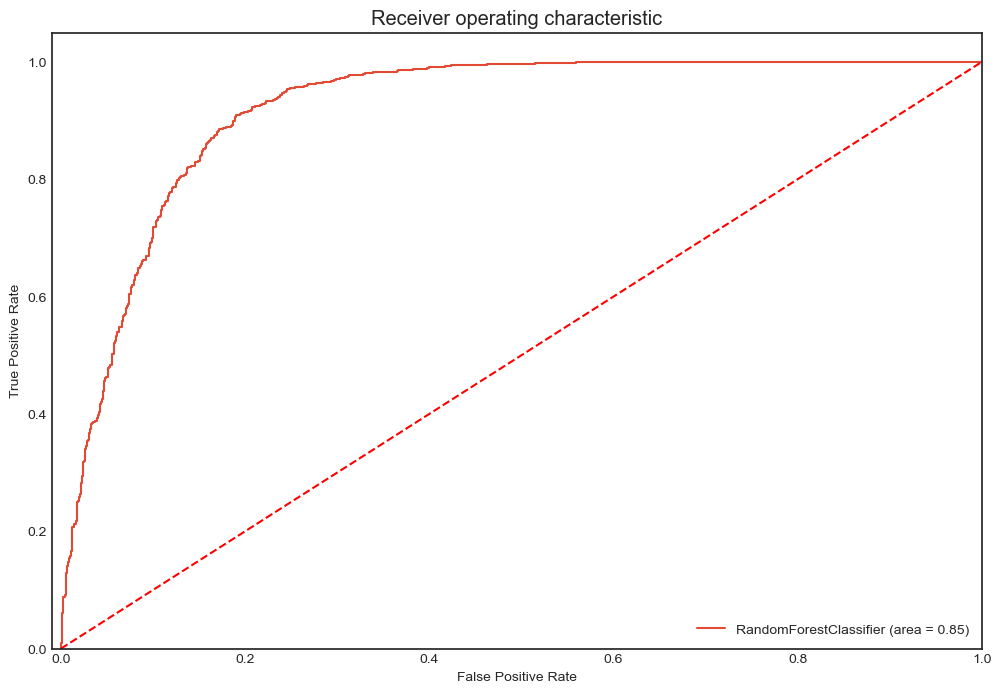

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Rand_roc_auc = roc_auc_score(y_test, Rand_class.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, Rand_class.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)' % Rand_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [55]:
import pickle
file=open('RandomForest_Classifier.pkl','wb')
#dump
pickle.dump(Rand_class,file)